In [1]:
#imports 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 
from time import perf_counter
import glob

# Exercise 1


### Explain the difference between strides and dilations in the context of the convolution operation.
* stride refer to the step size of the kernel when traversing the image. The default value is 1.
* dilation introduce another parameter to convolutional layers called the dilation rate.This defines a spacing between the values in a kernel: values in the filter are separated by some number of zeros.

### How do they impact the nature of the output?

* When using stries we can reduce the number of pixels in the output: thus, the output to be smaller than the input. The larger the stride, the smaller the output tensor will be.
* For dilations, we can also change the nature of the output by increasing the receptive field (allowing it to capture more information from the input tensor), but without increasing the number of parameters. This can cause some loss of resolution, as the output pixels are spaced further apart. 

### How do they impact the number of flops needed to compute the output?

For strides the number of flops can be reduced by reducing the number of pixels that the filter needs to process in the input image. Thus, a larger strides means that fewer computations are needed to generate the output.
For dilations, it can impact the number of flops by changing the effective size of the filter. So, if we increase the dilation this means that more flops we have: convolutional kernel becomes larger and less operations fit to the input and in this way the number of flops goes down.
In the end, a larger stride reduces the number of FLOPs needed to compute the output and also a larger dilation reduces the number of FLOPs.


# Exercise 2

* playaround with functions: findChessBoardCorners

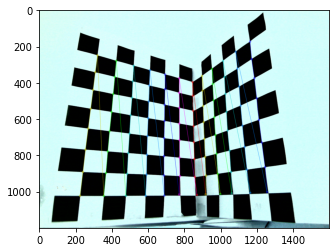

In [2]:
img = cv.imread('image001.jpg')
# convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# plt.imshow(gray, cmap='gray')
# Find the chess board corners
ret, corners = cv.findChessboardCorners(gray, (8,12), None) 
# If found, add object points, image points (after refining them)
if ret == True:
    # Draw and display the corners
    cv.drawChessboardCorners(img, (8,12), corners, ret)
    plt.imshow(img) 

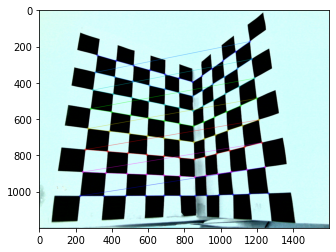

In [8]:
img_path = 'image001.jpg'
width = 12
height = 8
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((width*height,3), np.float32)
objp[:,:2] = np.mgrid[0:width,0:height].T.reshape(-1,2) 

# print(objp)
# objp = objp * 0.027  # 27mm is the size of the square in the chessboard
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('image001.jpg')
for img in images:
    img = cv.imread(img_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (width,height), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (width,height), corners2, ret)
        plt.imshow(img)
cv.destroyAllWindows()



* Apply function to calibrate the camera 

In [9]:

ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None) 
print("Camera matrix: ", mtx)

Camera matrix:  [[5.84482047e+02 0.00000000e+00 1.20253814e+03]
 [0.00000000e+00 7.54043809e+02 9.70577299e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


* Unidstortion : we can take an image and undistort it.

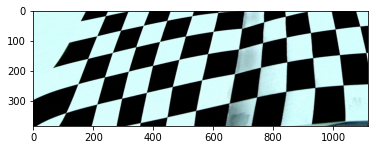

In [134]:
new_image = cv.imread('image001.jpg')
h,  w = new_image.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h)) 
# undistort
dst = cv.undistort(new_image, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)
plt.show()


* Calculate the error on re-projection

In [135]:
# re-projection error
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) ) 

total error: 2.046534136647099


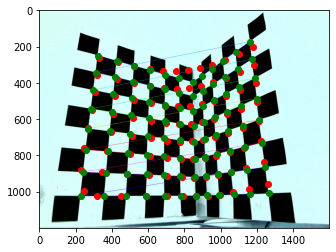

In [136]:

# using the projection matrix, reproject all the real domain square corners in the calibration pattern provided.
imgpoints2, _ = cv.projectPoints(objpoints[0], rvecs[0], tvecs[0], mtx, dist)
# plot the image
plt.imshow(img)
# plot the reprojected points with green
plt.scatter(imgpoints2[:,0,0], imgpoints2[:,0,1], c='r')
# also plot the original points with red
plt.scatter(imgpoints[0][:,0,0], imgpoints[0][:,0,1], c='g')
plt.show()


### Search for specification for my phone: galaxy A51
#### intrinsic camera parameters with the specifications provided by the manufacturer:
* main camera: 48 MP sensor f/2.0 lens,  a 26mm focal length.
* ultra-wide module: 12 MP sensor paired with a 14mm-equivalent f/2.2 lens, 14mm focal length.
* macro camera: 5 MP sensor and f/2.2 lens.
* depth: 5 MP sensor and f/2.4 lens

Take a photo with my phone.

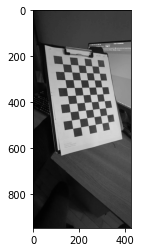

In [36]:
phone = cv.imread('telefon3.jpg')
# convert to grayscale
gray = cv.cvtColor(phone, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

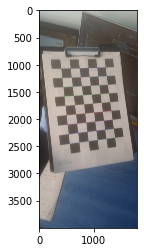

In [5]:
img_path = 'telefon4.jpg' # width = 1800, height = 4000
width = 6
height = 9
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((width*height,3), np.float32)
objp[:,:2] = np.mgrid[0:width,0:height].T.reshape(-1,2) 

# print(objp)
# objp = objp * 0.027  # 27mm is the size of the square in the chessboard
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('telefon4.jpg')
for img in images:
    img = cv.imread(img_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (width,height), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (width,height), corners2, ret)
        plt.imshow(img)
cv.destroyAllWindows()


In [6]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None) 
print("Camera matrix: \n ", mtx) 

Camera matrix: 
  [[2.49060926e+03 0.00000000e+00 8.40367652e+02]
 [0.00000000e+00 2.48838587e+03 2.02452339e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In camera matrix the focal lengths fx, fy are expressed in pixel units. To convert focals in World units Fx,Fx:
Fx = fx * W / w or Fy = fy * H / h 


In [9]:
# focal length in pixels 26, focal width in mm 26
image_width = 1800
focal_width = 26
focal_length = 26
fx = mtx[0,0]
fy = mtx[1,1] 
f_results_x = fx * focal_width / image_width 
f_results_y = fy * focal_width / image_width

print("Focal length in pixels: ", f_results_x)
print("Focal length in pixels: ", f_results_y)

Focal length in pixels:  35.97546714795932
Focal length in pixels:  35.94335141552883


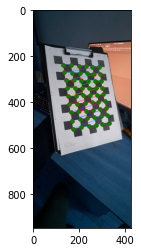

In [39]:
# using the projection matrix, reproject all the real domain square corners in the calibration pattern provided.
imgpoints2, _ = cv.projectPoints(objpoints[0], rvecs[0], tvecs[0], mtx, dist)
# plot the image
plt.imshow(img)
# plot the reprojected points
plt.scatter(imgpoints2[:,0,0], imgpoints2[:,0,1], c='r', s=10)
# also plot the original points
plt.scatter(imgpoints[0][:,0,0], imgpoints[0][:,0,1], c='g', s=10)
plt.show()


# Exercise 3

First, use the provided correspondences from lab and using P matrix re-project the 3D points in the image

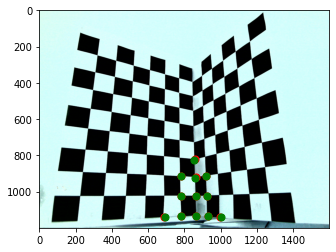

In [15]:
#  using the provided correspondences from lab 
X = [0, 0.027,     0,    0,  0.027,         0,   0.054,       0,       0,      0,   0.027,     0]
Y = [0,	  0,	0.027,    0,	   0,     0.027,	   0,   0.054,       0,	    0,       0,     0.027]
Z = [0,	  0,     0,0.027,  0.027,	0.027,       0,	  0,	  0.054,	0.081,   0.054,	0.054]

# position of the mouse in the image frame at the approx. posiiton of the square 
# corner. Casting to integers will mean the index of the pixel approx. representing the corner
x = [866.575949367089,	783.031645569620,	930.373417721519,	862.018987341772,
     781.512658227848,	925.816455696203,	685.816455696203,	995.689873417722,	
     863.537974683544,	857.462025316456,	781.512658227848,	921.259493670886]

y = [1132.90506329114,	1135.94303797468,	1135.94303797468,	1026.57594936709,
     1023.53797468354,	1023.53797468354,	1137.46202531646,	1142.01898734177,
     917.208860759494,	821.512658227848,	915.689873417722,	912.651898734177]


calibration_img = cv.imread("image001.jpg")
plt.imshow(calibration_img)
for i in range(len(x)):
  plt.scatter(x[i], y[i], s=50, c='red', marker='o') 

# We can take the P matrix from lab:
P = np.array([[-2.90472954e+03,  3.43163484e+02,  3.34242709e+02,  5.43581050e+02],
 [-1.35131680e+03, -1.34480285e+03, -1.97704973e+03,  7.11077910e+02],
 [-1.25083767e+00, -1.24480479e+00,  4.83520921e-01,  6.27638493e-01]])
# using this matrix, we can reproject the points in the image frame to the real world frame
points_real = np.array([X, Y, Z])
XYZ_real = np.ones((4, len(X)))
XYZ_real[:3, :] = points_real
                   
points_xy = P @ XYZ_real
points_xy = points_xy / points_xy[2, :]
plt.scatter(points_xy[0, :], points_xy[1, :], s=50, c='green', marker='o')


plt.show()

### Start with another set of correspondences

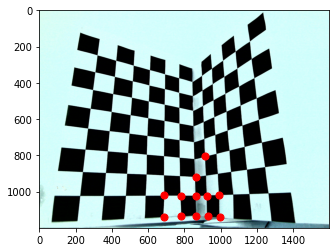

In [40]:
X = [0,  0.027,  0    , 0     , 0.027  , 0     , 0.054 ,  0     ,  0    ,   0.054 ,  0      ,  0      ]
Y = [0,     0 ,  0.027, 0     ,  0     , 0.027 ,  0    ,  0.054 ,  0    ,     0   ,   0.054 ,  0.027  ]
Z = [0,     0 ,   0   , 0.027 , 0.027  , 0.027 ,  0    ,  0     , 0.054 ,    0.027,   0.027 ,  0.081  ]


# X = [0, 0.027,     0,       0,   0.027,         0,   0.054,       0,       0,        0,    0.027,     0]
# Y = [0,	  0,	0.027,    0,	   0,     0.027,	   0,   0.054,       0,	        0,       0,     0.027]
# Z = [0,	  0,     0,   0.027,   0.027,	  0.027,       0,	    0,	  0.054,	0.081,   0.054,	   0.054]

# in a cmd using matplotlib we were able to take the coordinates of the points in the image frame 
x = [866.575949367089,	783.031645569620,	930.373417721519,	862.018987341772,
     781.512658227848,	925.816455696203,	685.816455696203,	995.689873417722,	
     863.537974683544,	688, 993	, 915	]

y = [1132.90506329114,	1135.94303797468,	1135.94303797468,	1026.57594936709,
     1023.53797468354,	1023.53797468354,	1137.46202531646,	1142.01898734177,
     917.208860759494,	1017, 1017	, 803   ]

# display the points in the image frame 
calibration_img = cv.imread("image001.jpg")
plt.imshow(calibration_img)
for i in range(len(x)):
     plt.scatter(x[i], y[i], s=50, c='red', marker='o')
plt.show()

# now we can use these new values and calculate the P matrix and using the code from the laboratory we obtain P matrix:
P = np.array([[ 2.98426901e+03, -3.42033987e+02, -3.42495665e+02, -5.57304806e+02],
 [ 1.39400788e+03 , 1.39013946e+03,  2.02648592e+03 ,-7.29021024e+02],
 [ 1.29035977e+00 , 1.28677703e+00,-4.95486874e-01, -6.43484795e-01]])



### Here are the results using another set of correspondences

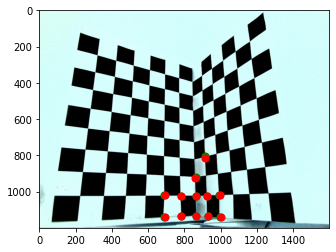

In [19]:

calibration_img = cv.imread("image001.jpg")
plt.imshow(calibration_img)
for i in range(len(x)):
  plt.scatter(x[i], y[i], s=50, c='green', marker='o') 
# using this matrix, we can reproject the points in the image frame to the real world frame
points_real = np.array([X, Y, Z])
XYZ_real = np.ones((4, len(X)))
XYZ_real[:3, :] = points_real
                   
points_xy = P @ XYZ_real
points_xy = points_xy / points_xy[2, :]
plt.scatter(points_xy[0, :], points_xy[1, :], s=50, c='red', marker='o')


plt.show()

Using the projection matrix computed using the provided correspondences, re-project all the real domain square corners in the calibration pattern provided.

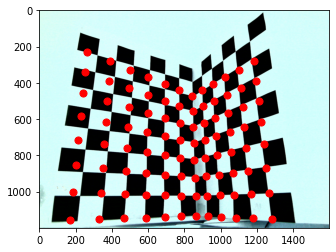

In [55]:
step_to_consider = 0.027
#take all corners of the chessboard
X = [] 
Y = []
Z = [] 
# take each plane and calculate the points

for z in range(0,8):
    for x in range(0,7):
        X.append(x*step_to_consider)
        Y.append(0)
        Z.append(z*step_to_consider) 
    for y in range(1,6):
        X.append(0)
        Y.append(y*step_to_consider)
        Z.append(z*step_to_consider)

XYZ_homogeneous = np.array([X, Y, Z, np.ones(len(X))], dtype=np.float32)
points_xy = P @ XYZ_homogeneous
points_xy = points_xy / points_xy[2, :]
plt.imshow(calibration_img)
plt.scatter(points_xy[0, :], points_xy[1, :], s=50, c='red', marker='o')
plt.show()

* Now we can take another values for X,Y,Z and use the P matrix computed above to se the results:

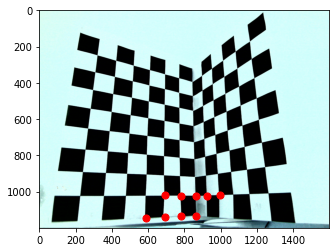

In [43]:
# new correspondence points
X_new = [0, 0.027, 0.054, 0.081,     0,     0.027   ,  0.054   , 0 , 0  ]
Y_new = [0,     0,     0,     0,     0,     0        ,   0      , 0.054     , 0.027  ]
Z_new = [0,     0,     0,     0, 0.027,     0.027   ,   0.027  , 0.027 ,  0.027  ]   


# Use the same matrix computed in the previous step but with different points X_new, Y_new, Z_new
P = np.array([[ 2.98426901e+03, -3.42033987e+02, -3.42495665e+02, -5.57304806e+02],
 [ 1.39400788e+03 , 1.39013946e+03,  2.02648592e+03 ,-7.29021024e+02],
 [ 1.29035977e+00 , 1.28677703e+00,-4.95486874e-01, -6.43484795e-01]])

calibration_img = cv.imread("image001.jpg")
XYZ_homogeneous = np.ones((4, len(X_new)))
XYZ_homogeneous[:3, :] = np.array([X_new, Y_new, Z_new])
points_xy = P @ XYZ_homogeneous
points_xy = points_xy / points_xy[2, :]
plt.imshow(calibration_img)
plt.scatter(points_xy[0, :], points_xy[1, :], s=50, c='red', marker='o')
plt.show()


# Exercise 4
* "Pen and paper exercise" , thus an image (pdf format) is provided with calculations. (Homework2ex4.pdf)
